## Importing Required Modules 
1. importing numpy for mathematical operation on arrays and dataframe.
2. importing pandas for reading data and data manipualtion.
3. importing matplotlib and seaborn to show the insights and  visualization from the dataset.
3. importing warnings for Warning messages that are typically issued in dataframe where it is useful to alert the user of some condition in a program, where that condition (normally) doesn't warrant raising an exception and terminating the program.

## Reading Dataset and Checking the NaN Values , Data Types , and Statistical Analysis

1. 
2. 
3. 
4. Describe data --> which can give statistical analysis

# Exploratory Data Analysis (EDA)

In [1]:
# we find which features affect the car put together  

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
%matplotlib inline

In [4]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [5]:
sns.set(style='darkgrid')

### Since data is in form of csv file we have to use pandas read_csv to load the data

In [6]:
df=pd.read_csv('Automobile.csv')
df.head(5)

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa


### After loading it is important to check the complete information of data as it can indicate many of the hidden 
### infomation such as null values in columns and rows.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          398 non-null    object 
 1   mpg           398 non-null    float64
 2   cylinders     398 non-null    int64  
 3   displacement  398 non-null    float64
 4   horsepower    392 non-null    float64
 5   weight        398 non-null    int64  
 6   acceleration  398 non-null    float64
 7   model_year    398 non-null    int64  
 8   origin        398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


### Check whether any null values are there or not. if it is present then following can be done,
    1. Filling NaN values with mean, median and mode using fillna() method

In [8]:
df.isnull().sum()

name            0
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

### Before filling out the data, we have to check the outliers. 
### Box plot is best for checking out the outliers in data.
### after analysing the outlier we have to deal with them with the help of mean or mode accordingly

In [9]:
df['horsepower'].mean()

104.46938775510205

In [10]:
df['horsepower'].median()

93.5

In [11]:
df['horsepower'].fillna(df['horsepower'].mean(),inplace=True)

In [12]:
df.isnull().sum()

name            0
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [13]:
df.shape

(398, 9)

In [14]:
df_values=df['origin'].value_counts().values
df_values

array([249,  79,  70], dtype=int64)

In [15]:
df_index=df['origin'].value_counts().index
df_index

Index(['usa', 'japan', 'europe'], dtype='object')

In [16]:
# change column name mpg to average
df.rename(columns={'mpg':'average'},inplace=True)

In [17]:
#change name to car_name
df.rename(columns={'name':'car_name'},inplace=True)

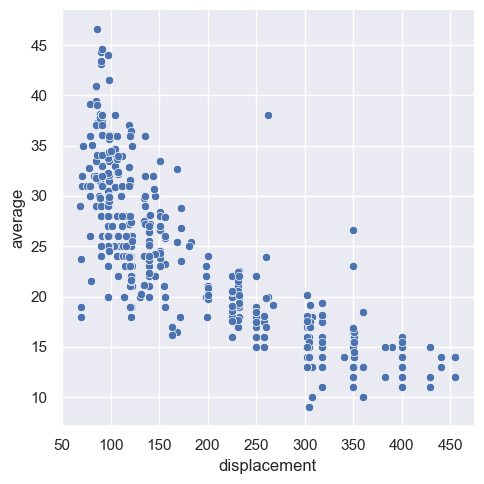

In [18]:
sns.relplot(x='displacement',y='average',data=df);

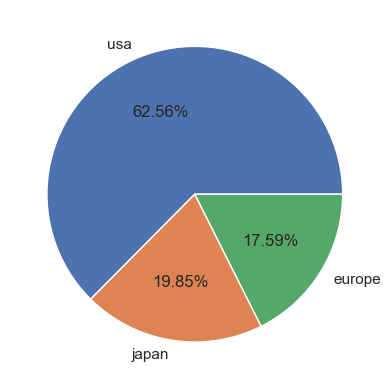

In [20]:
plt.pie(df_values,labels=df_index,autopct='%.2f%%');

In [22]:
df['average']=df['average'].astype(int)

In [23]:
df.dtypes

car_name         object
average           int32
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin           object
dtype: object

In [25]:
col=list(df.columns)
col

['car_name',
 'average',
 'cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'model_year',
 'origin']

In [26]:
df[[col[0]]+col[6:8]+[col[1]]+col[4:6]+[col[2]]+[col[3]]+[col[8]]]


,car_name,acceleration,model_year,average,horsepower,weight,cylinders,displacement,origin
0,chevrolet chevelle malibu,12.0,70,18,130.000000,3504,8,307.0,usa
1,buick skylark 320,11.5,70,15,165.000000,3693,8,350.0,usa
2,plymouth satellite,11.0,70,18,150.000000,3436,8,318.0,usa
3,amc rebel sst,12.0,70,16,150.000000,3433,8,304.0,usa
4,ford torino,10.5,70,17,140.000000,3449,8,302.0,usa
5,ford galaxie 500,10.0,70,15,198.000000,4341,8,429.0,usa
6,chevrolet impala,9.0,70,14,220.000000,4354,8,454.0,usa
7,plymouth fury iii,8.5,70,14,215.000000,4312,8,440.0,usa
8,pontiac catalina,10.0,70,14,225.000000,4425,8,455.0,usa
9,amc ambassador dpl,8.5,70,15,190.000000,3850,8,390.0,usa


In [27]:
b=df.groupby('origin')['average'].max().reset_index()
b

,origin,average
0,europe,44
1,japan,46
2,usa,39


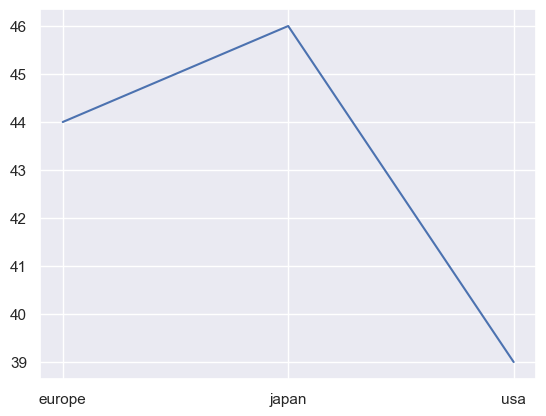

In [28]:
plt.plot(b['origin'],b['average']);

In [30]:
c=df.groupby('origin')['car_name'].count().reset_index()
c

,origin,car_name
0,europe,70
1,japan,79
2,usa,249


In [31]:
y=pd.merge(b,c,how='outer',on='origin')
y

,origin,average,car_name
0,europe,44,70
1,japan,46,79
2,usa,39,249


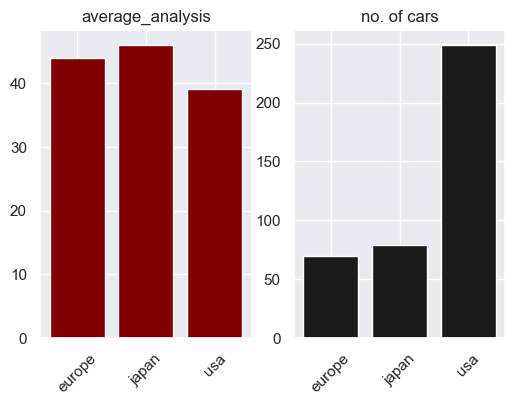

In [43]:
plt.figure(figsize=(6,4))
plt.subplot(1,2,1)
plt.bar(y['origin'],y['average'],color='maroon');
plt.xticks(y['origin'].unique(),rotation=45)
plt.title('average_analysis')
#plt.legend()

plt.subplot(1,2,2)
plt.bar(y['origin'],y['car_name'],color='k');
plt.xticks(y['origin'].unique(),rotation=45)
plt.title('no. of cars')
#plt.legend()
plt.show()

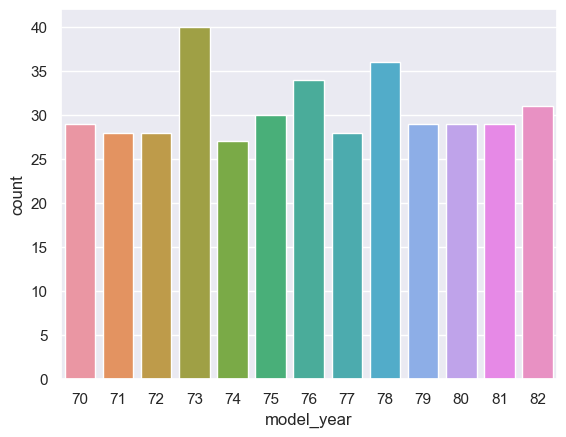

In [34]:
sns.countplot(x=df['model_year']);

In [35]:
df.describe()

,average,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.349246,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.752542,1.701004,104.269838,38.199187,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000
max,46.000000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


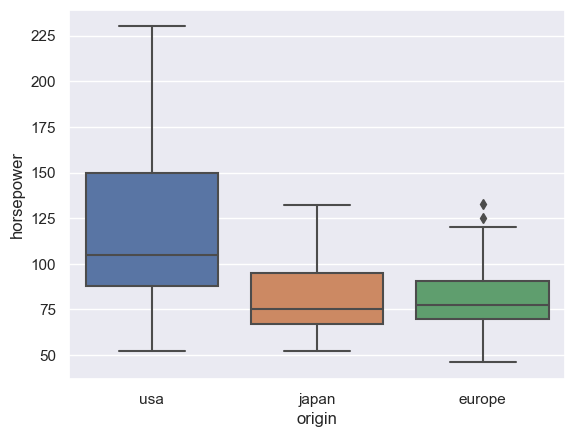

In [36]:
# In this plot we can see that the maximum and minimum horsepower of cars according to thier origin along with the mean.
sns.boxplot(x='origin',y='horsepower',data=df);

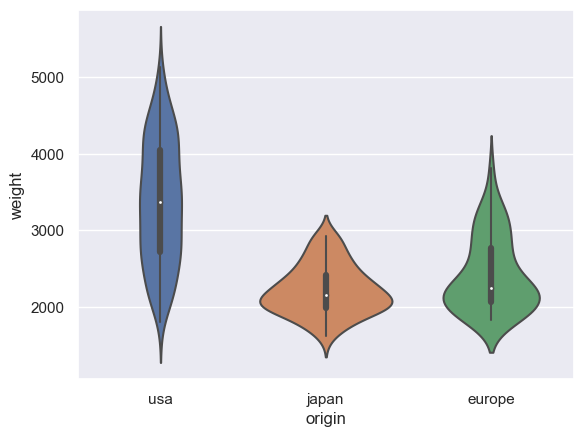

In [37]:
# In this plot we can see that the maximum and minimum weight of cars respective to thier origin along with the mean.
sns.violinplot(x='origin',y='weight',data=df);

### In Pair plot we can see the multiple scatter plot along with histogram(kde) and we can check co-relation accordingly.

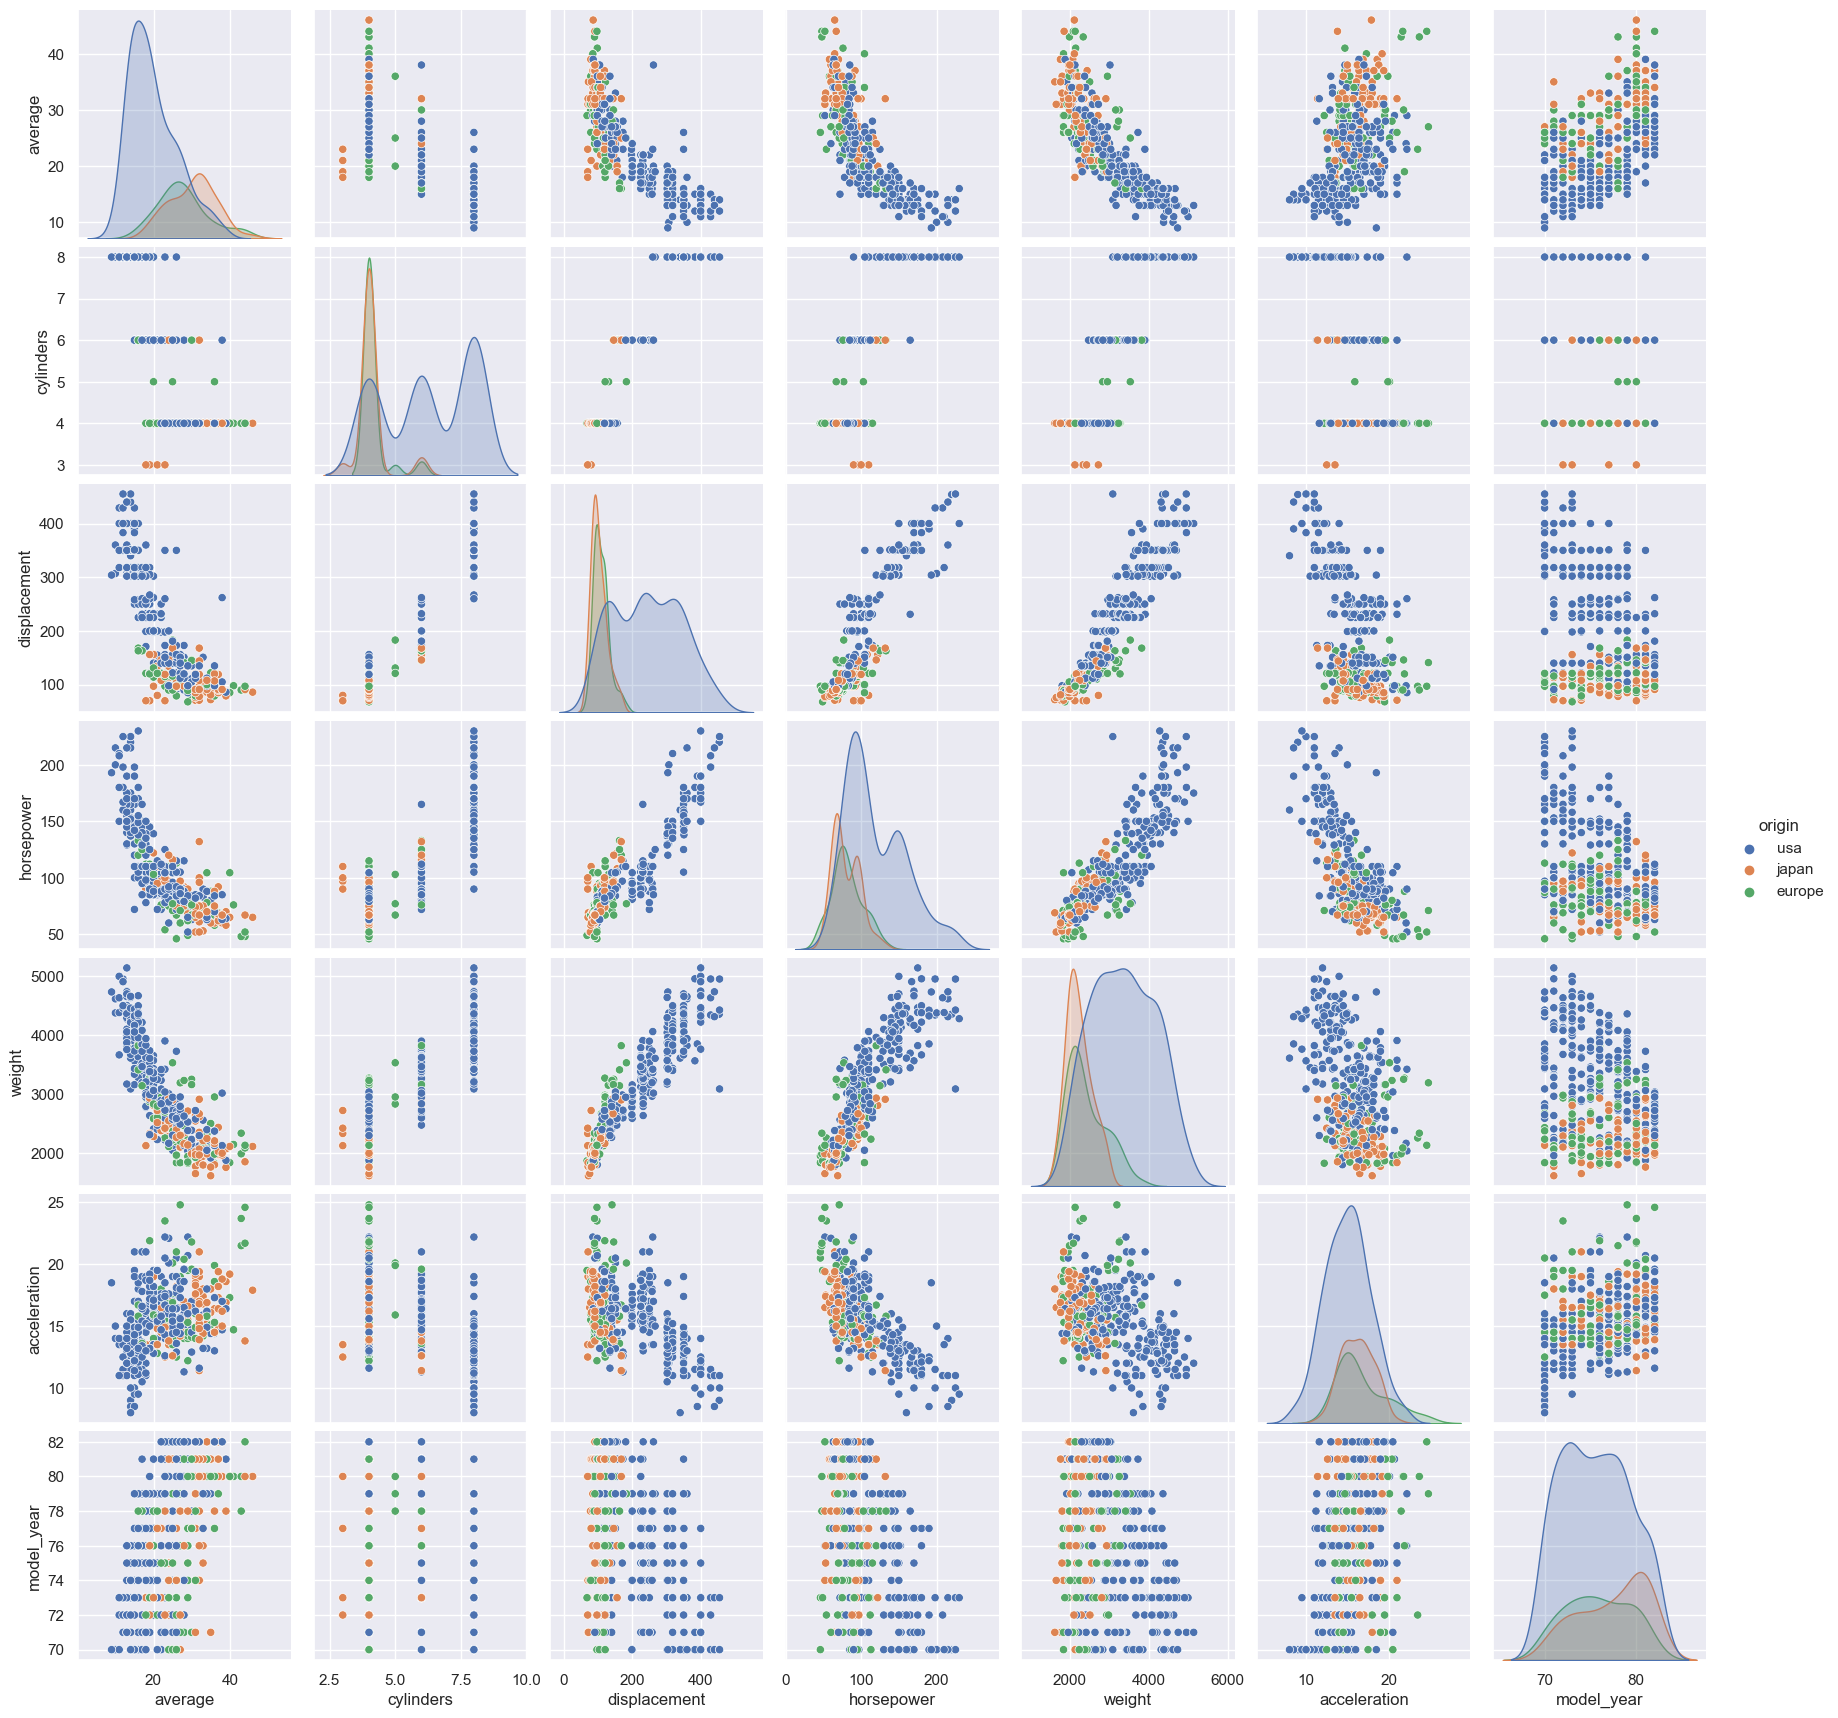

In [38]:
sns.pairplot(df,hue="origin");

### This corr() function is mendatory for heatmap or you can use the outcomes to refer pair plot aswell in a numerical form.

In [39]:
heat=df.corr()
heat

,average,cylinders,displacement,horsepower,weight,acceleration,model_year
average,1.000000,-0.778031,-0.805987,-0.772839,-0.834721,0.421070,0.567783
cylinders,-0.778031,1.000000,0.950721,0.838939,0.896017,-0.505419,-0.348746
displacement,-0.805987,0.950721,1.000000,0.893646,0.932824,-0.543684,-0.370164
horsepower,-0.772839,0.838939,0.893646,1.000000,0.860574,-0.684259,-0.411651
weight,-0.834721,0.896017,0.932824,0.860574,1.000000,-0.417457,-0.306564
acceleration,0.421070,-0.505419,-0.543684,-0.684259,-0.417457,1.000000,0.288137
model_year,0.567783,-0.348746,-0.370164,-0.411651,-0.306564,0.288137,1.000000


### Heatmap is the best way to visualize data and basically analyse co-relation between variables in percentage/colour format.

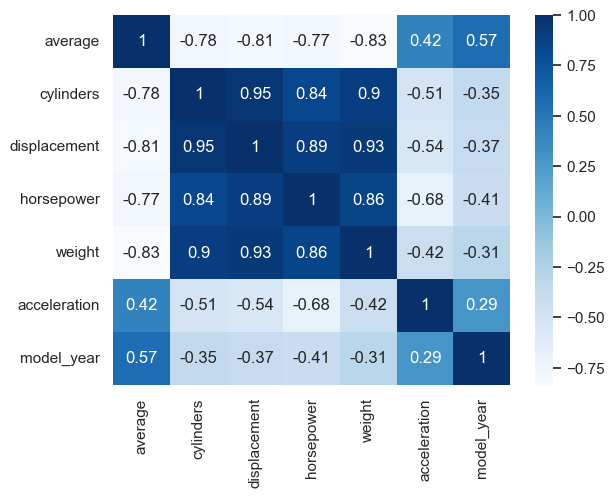

In [40]:
sns.heatmap(heat,cmap='Blues',annot=True);